In [46]:
%matplotlib inline
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [47]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

print(digits.images.shape)

(1797, 8, 8)


In [48]:
X = digits.data
Y = digits.target

In [49]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25, random_state=0)

In [152]:
params = [{'hidden_layer_sizes': (10,) , 'activation': 'logistic'},
          {'hidden_layer_sizes': (10,10), 'activation': 'logistic'},
          {'hidden_layer_sizes': (10,10, 10), 'activation': 'logistic'},
          {'hidden_layer_sizes': (10,) , 'activation': 'tanh'},
          {'hidden_layer_sizes': (10,10), 'activation': 'tanh'},
          {'hidden_layer_sizes': (10,10, 10), 'activation': 'tanh'}
         ]
labels = ["(10,)/logistic", "(10,10)/logistic", "(10,10,10)/logistic", "(10,)/tanh", "(10,10)/tanh", "(10,10,10)/tanh"]
plot_args = [{'c': 'red', 'linestyle': '-'},
            {'c': 'green', 'linestyle': '-'},
            {'c': 'blue', 'linestyle': '-'},
            {'c': 'red', 'linestyle': '--'},
            {'c': 'green', 'linestyle': '--'},
            {'c': 'blue', 'linestyle': '--'}]

In [153]:
mpsl = []

for label, param in zip(labels, params):
    mlp = MLPClassifier(max_iter=1000, **param)
    mlp.fit(Xtrain, ytrain)
    mpsl.append(mlp)
    

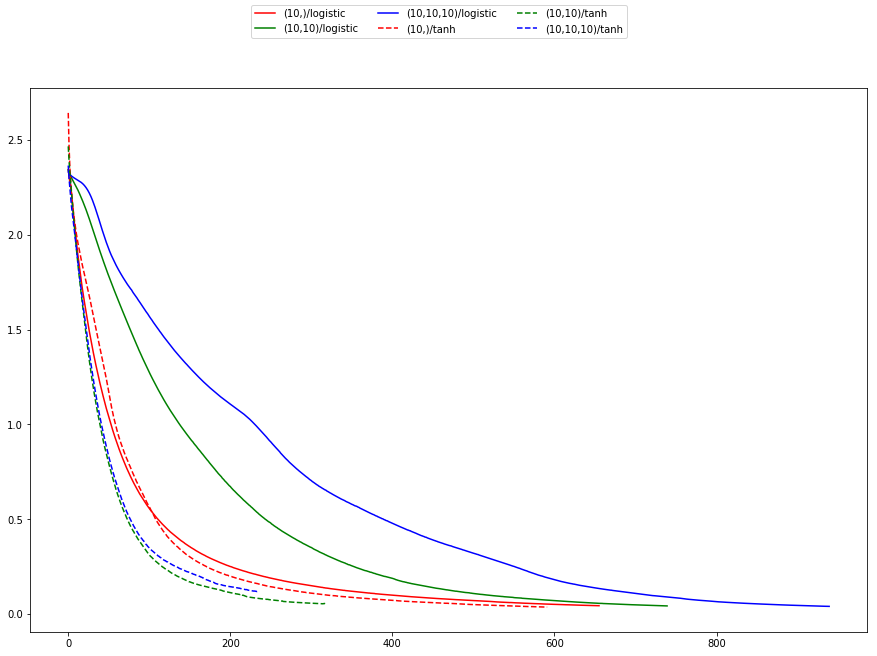

In [154]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

for mlp, label, args in zip(mpsl, labels, plot_args):
    axes.plot(mlp.loss_curve_, label=label, **args)
    
fig.legend(axes.get_lines(), labels, ncol=3, loc="upper center")

1) (10,)/logistic - 0.928888888889
2) (10,10)/logistic - 0.897777777778
3) (10,10,10)/logistic - 0.88
4) (10,)/tanh - 0.917777777778
5) (10,10)/tanh - 0.926666666667
6) (10,10,10)/tanh - 0.911111111111


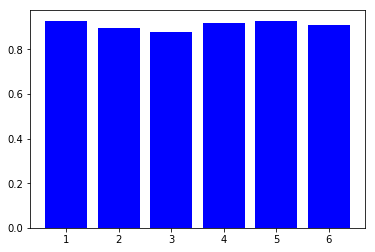

In [155]:
from sklearn.metrics import accuracy_score
score = []
i = 1

for mlp, label, args in zip(mpsl, labels, plot_args):
    pr = mlp.predict(Xtest)
    sc = accuracy_score(ytest, pr) 
    print(str(i) + ") " + str(label) + " - " + str(sc))
    i = i + 1
    score.append(sc)

scoreInt = list(map(int, score))
N = len(score)
x = range(N)
plt.bar(['1','2','3','4','5','6'], score,  color="blue")
plt.show()
